In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (5,3)

In [2]:
PATH_FOLDER = os.getcwd()

In [3]:
FILENAME_OA_OFFERS = "\\offer_acceptance_offers.csv"
FILENAME_OA_ORDERS = "\\offer_acceptance_orders.csv"
PATH_FILE_OA_OFFERS = PATH_FOLDER + FILENAME_OA_OFFERS
PATH_FILE_OA_ORDERS = PATH_FOLDER + FILENAME_OA_ORDERS

In [4]:
oa_offers_orig = pd.read_csv(PATH_FILE_OA_OFFERS)
oa_orders_orig = pd.read_csv(PATH_FILE_OA_ORDERS)
oa_offers = oa_offers_orig
oa_orders = oa_orders_orig

In [25]:
# EDA FUNCTIONS:
def check_nulls(df):
    return df.isnull().mean(axis=0)
def plot_numerical_column_histogram(column, show_logged=False):
    """
    Given a numerical column, plot the histogram.
    If show_logged set to True, show a secondary version of the plot but logged
    
    Args:
        column (pd.Series): numerical column. 
        show_logged (boolean): if set to true, shows if the column can look normal if logged. Only for right skewed columns inside 0 and inf
    Returns:
        None
    """
    if show_logged==False:
        fig, axs = plt.subplots(figsize=(5,5))
        axs.hist(column)
        axs.set_title("Histogram")
    else:
        fig, axs = plt.subplots(1,2,figsize=(10,5))
        axs[0].hist(column)
        axs[0].set_title("Histogram")
        axs[1].hist(column.apply(np.log1p))
        axs[1].set_title("Histogram - logged")
    return axs

def show_categorical_column_value_counts(column, with_null=False):
    """
    Shows frequency of categories in a categorical column
    
    Args:
        column (pd.Series): categorical column. 
    Returns:
        (pd.Series): the value_counts
    """
    value_counts = column.value_counts(normalize=True)
    return value_counts

## **OA Offers**

In [7]:
oa_offers.head(5)

,CARRIER_ID,REFERENCE_NUMBER,CREATED_ON_HQ,RATE_USD,OFFER_TYPE,SELF_SERVE,IS_OFFER_APPROVED,AUTOMATICALLY_APPROVED,MANUALLY_APPROVED,WAS_EVER_UNCOVERED,COVERING_OFFER,LOAD_DELIVERED_FROM_OFFER,RECOMMENDED_LOAD,VALID
0,0629d63476c157a6cfe234f7a34422eb0ad94998c2d082...,ce3548db155049cc1ccce2da041cec607942e4f779fc2d...,2021-11-03 08:54:13,9546.0,pool,1,0,0,0,0,0,0,1,1
1,0629d63476c157a6cfe234f7a34422eb0ad94998c2d082...,ce3548db155049cc1ccce2da041cec607942e4f779fc2d...,2021-11-03 08:57:27,9159.0,pool,1,1,0,1,0,1,1,1,1
2,0629d63476c157a6cfe234f7a34422eb0ad94998c2d082...,ce3548db155049cc1ccce2da041cec607942e4f779fc2d...,2021-11-03 08:57:28,9288.0,pool,0,0,0,0,0,0,0,0,1
3,0629d63476c157a6cfe234f7a34422eb0ad94998c2d082...,ce3548db155049cc1ccce2da041cec607942e4f779fc2d...,2021-11-03 08:57:40,9159.0,pool,0,1,0,1,0,0,0,0,1
4,16badfc6202cb3f8889e0f2779b19218af4cbb736e56ac...,ce3548db155049cc1ccce2da041cec607942e4f779fc2d...,2021-11-03 09:05:43,11610.0,pool,0,0,0,0,0,0,0,0,1


### OA Offers EDA

In [8]:
temp_df = oa_offers

In [26]:
check_nulls(temp_df)

CARRIER_ID                   0.0
REFERENCE_NUMBER             0.0
CREATED_ON_HQ                0.0
RATE_USD                     0.0
OFFER_TYPE                   0.0
SELF_SERVE                   0.0
IS_OFFER_APPROVED            0.0
AUTOMATICALLY_APPROVED       0.0
MANUALLY_APPROVED            0.0
WAS_EVER_UNCOVERED           0.0
COVERING_OFFER               0.0
LOAD_DELIVERED_FROM_OFFER    0.0
RECOMMENDED_LOAD             0.0
VALID                        0.0
dtype: float64

In [19]:
bool_column_names = ['SELF_SERVE', 'IS_OFFER_APPROVED',
       'AUTOMATICALLY_APPROVED', 'MANUALLY_APPROVED', 'WAS_EVER_UNCOVERED',
       'COVERING_OFFER', 'LOAD_DELIVERED_FROM_OFFER', 'RECOMMENDED_LOAD', 'VALID']
categorical_column_names = ["OFFER_TYPE"]
numerical_column_names = ["RATE_USD"]

In [20]:
show_categorical_column_value_counts(temp_df["OFFER_TYPE"])

quote    0.840263
pool     0.159737
Name: OFFER_TYPE, dtype: float64

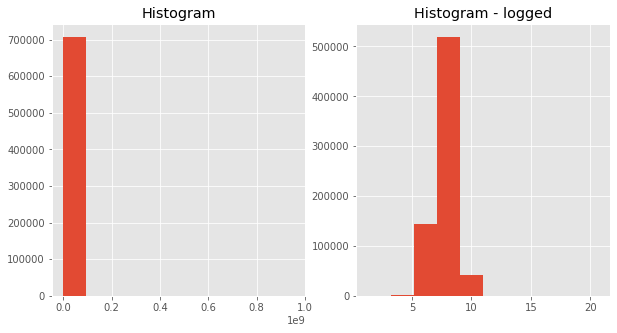

In [21]:
 _= plot_numerical_column_histogram(temp_df["RATE_USD"], True)

In [22]:
temp_df[bool_column_names].mean(axis=0)

SELF_SERVE                   0.356980
IS_OFFER_APPROVED            0.270522
AUTOMATICALLY_APPROVED       0.085904
MANUALLY_APPROVED            0.186036
WAS_EVER_UNCOVERED           0.056934
COVERING_OFFER               0.211056
LOAD_DELIVERED_FROM_OFFER    0.206284
RECOMMENDED_LOAD             0.225527
VALID                        0.953419
dtype: float64

### OA Offers Data Cleaning

In [23]:
data_clean_first_time = False

if data_clean_first_time:
    
    oa_offers["REFERENCE_NUMBER"] = oa_offers["REFERENCE_NUMBER"].str.split('''"''').apply(lambda x: x[1])
    
    oa_offers["CREATED_ON_HQ"] = pd.to_datetime(oa_offers["CREATED_ON_HQ"])

    oa_offers.loc[:,bool_column_names] = (oa_offers.loc[:,bool_column_names]).astype(np.int8)

    oa_offers.to_csv(PATH_FILE_OA_OFFERS,index=False)

## OA Orders

### OA Orders EDA

In [27]:
temp_df = oa_orders
check_nulls(temp_df)

REFERENCE_NUMBER                     0.000000
ORDER_DATETIME_PST                   0.000000
PICKUP_DEADLINE_PST                  0.000000
DELIVERY_TIME_CONSTRAINT             0.000025
ORIGIN_3DIGIT_ZIP                    0.000025
DESTINATION_3DIGIT_ZIP               0.000025
APPROXIMATE_DRIVING_ROUTE_MILEAGE    0.003236
PALLETIZED_LINEAR_FEET               0.000025
FD_ENABLED                           0.002406
EXCLUSIVE_USE_REQUESTED              0.000025
HAZARDOUS                            0.000025
REEFER_ALLOWED                       0.000025
STRAIGHT_TRUCK_ALLOWED               0.000025
LOAD_BAR_COUNT                       0.000025
LOAD_TO_RIDE_REQUESTED               0.000025
ESTIMATED_COST_AT_ORDER              0.000000
TRANSPORT_MODE                       0.000064
dtype: float64

In [13]:
oa_orders["TRANSPORT_MODE"].value_counts()

PTL             134908
FTL              79754
LTL              55774
VLTL              9252
CONSOLIDATOR      1200
Name: TRANSPORT_MODE, dtype: int64

In [14]:
oa_orders["DELIVERY_TIME_CONSTRAINT"].value_counts()

SCHEDULE                  145885
NONE                      113061
DEADLINE_WITH_SCHEDULE      6799
NOTIFY                      5368
APPOINTMENT                 5203
WINDOW                      3124
DEADLINE                    1459
Name: DELIVERY_TIME_CONSTRAINT, dtype: int64

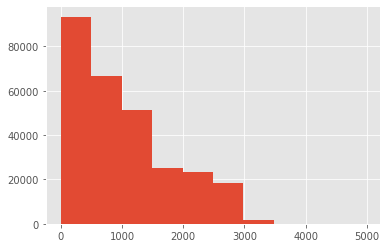

In [15]:
APPROXIMATE_DRIVING_ROUTE_MILEAGE_column = oa_orders["APPROXIMATE_DRIVING_ROUTE_MILEAGE"]
_ = plt.hist(APPROXIMATE_DRIVING_ROUTE_MILEAGE_column)

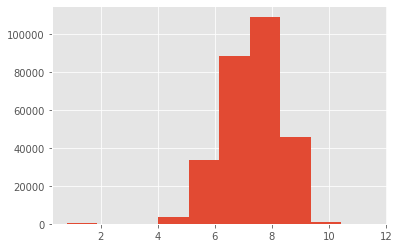

In [16]:
ESTIMATED_COST_AT_ORDER_column = oa_orders["ESTIMATED_COST_AT_ORDER"]
ESTIMATED_COST_AT_ORDER_column = ESTIMATED_COST_AT_ORDER_column.apply(np.log1p)
_ = plt.hist(ESTIMATED_COST_AT_ORDER_column)

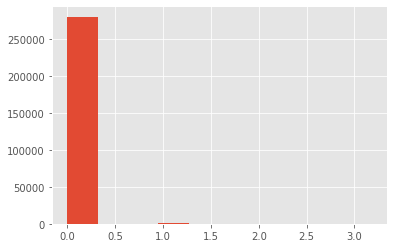

In [17]:
LOAD_BAR_COUNT_column = oa_orders["LOAD_BAR_COUNT"]
LOAD_BAR_COUNT_column = LOAD_BAR_COUNT_column.apply(np.log1p)
_ = plt.hist(LOAD_BAR_COUNT_column)

In [18]:
bool_column_names = ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED','HAZARDOUS', 
                     'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED','LOAD_TO_RIDE_REQUESTED']
oa_orders[bool_column_names].mean(axis=0)

FD_ENABLED                 0.999368
EXCLUSIVE_USE_REQUESTED    0.145191
HAZARDOUS                  0.001374
REEFER_ALLOWED             0.734317
STRAIGHT_TRUCK_ALLOWED     0.707760
LOAD_TO_RIDE_REQUESTED     0.271945
dtype: float64

### OA Orders Data Cleaning

In [19]:
data_clean_first_time = False

if data_clean_first_time:
    
    oa_orders["REFERENCE_NUMBER"] = oa_orders["REFERENCE_NUMBER"].str.split('''"''').apply(lambda x: x[1])

    oa_orders.loc[:,bool_column_names] = (oa_orders.loc[:,bool_column_names]).astype(float)

    oa_orders.to_csv(PATH_FILE_OA_ORDERS,index=False)

## OA Join

In [20]:
def dataclean_ftl_duplicate_references(oa):
    '''
    Part of a greater data cleaning on removing incorrect FTL labels,
    Removes FTL rows that have reference numbers that show up more than once, as those rows are incorrectly labeled FTL
    '''
    assert "TRANSPORT_MODE" in oa.columns
    assert "REFERENCE_NUMBER" in oa.columns
    oa_ftl = oa[oa["TRANSPORT_MODE"]=="FTL"]
    temp_counter = oa_ftl["REFERENCE_NUMBER"].value_counts()
    temp_counter = temp_counter.reset_index().rename(columns={"index":"REFERENCE_NUMBER","REFERENCE_NUMBER":"count"})
    oa_ftl_counted = oa_ftl.merge(temp_counter,on=["REFERENCE_NUMBER"])
    oa_ftl_duplicate_reference_numbers = oa_ftl_counted[oa_ftl_counted["count"]>1]
    oa = oa.drop(list(oa_ftl_duplicate_reference_numbers.index), axis=0)    
    return oa

def dataclean_nonquote_ftl(oa):
    '''
    Part of a greater data cleaning on removing incorrect FTL labels,
    Removes FTL rows that don't have quote as the transport mode
    '''
    assert "OFFER_TYPE" in oa.columns
    assert "TRANSPORT_MODE" in oa.columns    
    oa = oa[~((oa["TRANSPORT_MODE"]=="FTL") & (oa["OFFER_TYPE"]!="quote"))]
    return oa


PATH_FILE_oa = PATH_FOLDER + "\\oa.csv"

data_clean_first_time = 1
if data_clean_first_time:
    oa_orders = dataclean_ftl_duplicate_references(oa_orders)
    oa = oa_orders.merge(oa_offers, on=["REFERENCE_NUMBER"],how="inner")
    oa = dataclean_nonquote_ftl(oa)
else:
    oa = pd.read_csv(PATH_FILE_oa)

(280906, 17)
(705541, 30)


In [27]:
oa

,REFERENCE_NUMBER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,DELIVERY_TIME_CONSTRAINT,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,...,COVERING_OFFER,LOAD_DELIVERED_FROM_OFFER,RECOMMENDED_LOAD,VALID,ZIP3,Xcoord,Ycoord,ZIP3_dest,Xcoord_dest,Ycoord_dest
0,76aceba45071865cc063e408a6e8df29227a0aa0b068c1...,2021-05-18 14:09:13,2021-05-24 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
1,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
2,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,0,0,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
3,38ddf0800307e11e1c52bd96311b6eda0d498c58b48074...,2021-05-18 14:05:16,2021-05-21 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,1,1,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
4,df3ebe190d8104faaece45f3997da25f6a81deda1d209a...,2021-05-18 14:15:53,2021-05-26 15:00:00,NONE,382,456,472.0,52.0,1.0,1.0,...,1,1,0,1,382,-88.674553,36.298184,456,-82.856504,38.972217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294818,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294819,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294820,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848
294821,345fc7a0e066a9b1a9f0d609b723b246b5f792e8528268...,2022-08-16 13:00:05,2022-08-22 13:00:00,SCHEDULE,758,689,759.0,49.0,1.0,1.0,...,0,0,0,1,758,-95.669057,31.448533,689,-98.905744,40.338848


### OA Join EDA

In [21]:
oa.isnull().mean(axis=0)

REFERENCE_NUMBER                     0.000000
ORDER_DATETIME_PST                   0.000000
PICKUP_DEADLINE_PST                  0.000000
DELIVERY_TIME_CONSTRAINT             0.000003
ORIGIN_3DIGIT_ZIP                    0.000003
DESTINATION_3DIGIT_ZIP               0.000003
APPROXIMATE_DRIVING_ROUTE_MILEAGE    0.003299
PALLETIZED_LINEAR_FEET               0.000003
FD_ENABLED                           0.000169
EXCLUSIVE_USE_REQUESTED              0.000003
HAZARDOUS                            0.000003
REEFER_ALLOWED                       0.000003
STRAIGHT_TRUCK_ALLOWED               0.000003
LOAD_BAR_COUNT                       0.000003
LOAD_TO_RIDE_REQUESTED               0.000003
ESTIMATED_COST_AT_ORDER              0.000000
TRANSPORT_MODE                       0.000011
CARRIER_ID                           0.000000
CREATED_ON_HQ                        0.000000
RATE_USD                             0.000000
OFFER_TYPE                           0.000000
SELF_SERVE                        

In [22]:
bool_column_names = []
bool_column_names += ['FD_ENABLED', 'EXCLUSIVE_USE_REQUESTED','HAZARDOUS', 
                     'REEFER_ALLOWED', 'STRAIGHT_TRUCK_ALLOWED','LOAD_TO_RIDE_REQUESTED']
bool_column_names += ['SELF_SERVE', 'IS_OFFER_APPROVED',
       'AUTOMATICALLY_APPROVED', 'MANUALLY_APPROVED', 'WAS_EVER_UNCOVERED',
       'COVERING_OFFER', 'LOAD_DELIVERED_FROM_OFFER', 'RECOMMENDED_LOAD', 'VALID']

oa[bool_column_names].mean(axis=0)

FD_ENABLED                   0.999806
EXCLUSIVE_USE_REQUESTED      0.187039
HAZARDOUS                    0.000054
REEFER_ALLOWED               0.650258
STRAIGHT_TRUCK_ALLOWED       0.647146
LOAD_TO_RIDE_REQUESTED       0.318361
SELF_SERVE                   0.357498
IS_OFFER_APPROVED            0.270434
AUTOMATICALLY_APPROVED       0.086028
MANUALLY_APPROVED            0.185825
WAS_EVER_UNCOVERED           0.056883
COVERING_OFFER               0.211176
LOAD_DELIVERED_FROM_OFFER    0.206365
RECOMMENDED_LOAD             0.226007
VALID                        0.953415
dtype: float64

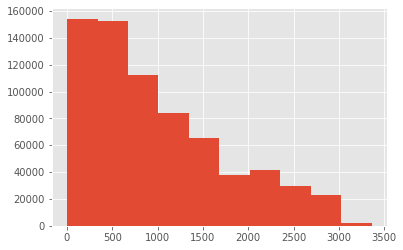

In [23]:
APPROXIMATE_DRIVING_ROUTE_MILEAGE_column = oa["APPROXIMATE_DRIVING_ROUTE_MILEAGE"]
_ = plt.hist(APPROXIMATE_DRIVING_ROUTE_MILEAGE_column)

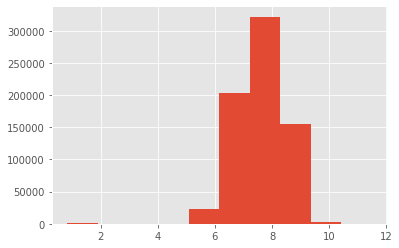

In [24]:
ESTIMATED_COST_AT_ORDER_column = oa["ESTIMATED_COST_AT_ORDER"]
ESTIMATED_COST_AT_ORDER_column = ESTIMATED_COST_AT_ORDER_column.apply(np.log1p)
_ = plt.hist(ESTIMATED_COST_AT_ORDER_column)

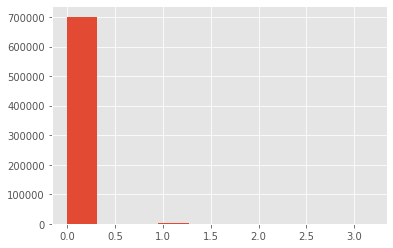

In [25]:
LOAD_BAR_COUNT_column = oa["LOAD_BAR_COUNT"]
LOAD_BAR_COUNT_column = LOAD_BAR_COUNT_column.apply(np.log1p)
_ = plt.hist(LOAD_BAR_COUNT_column)

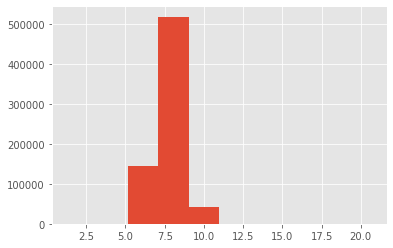

In [26]:
RATE_USD_column = oa["RATE_USD"]
RATE_USD_column = RATE_USD_column.apply(np.log1p)
_ = plt.hist(RATE_USD_column)

In [27]:
oa["DELIVERY_TIME_CONSTRAINT"].value_counts()

SCHEDULE                  442873
NONE                      217120
APPOINTMENT                14041
DEADLINE_WITH_SCHEDULE     12793
WINDOW                      8140
NOTIFY                      6940
DEADLINE                    3362
Name: DELIVERY_TIME_CONSTRAINT, dtype: int64

In [28]:
oa["OFFER_TYPE"].value_counts()

quote    594522
pool     110749
Name: OFFER_TYPE, dtype: int64

In [29]:
oa["TRANSPORT_MODE"].value_counts()

PTL             422636
FTL             269300
LTL               8091
VLTL              3338
CONSOLIDATOR      1898
Name: TRANSPORT_MODE, dtype: int64

In [30]:
oa

,REFERENCE_NUMBER,ORDER_DATETIME_PST,PICKUP_DEADLINE_PST,DELIVERY_TIME_CONSTRAINT,ORIGIN_3DIGIT_ZIP,DESTINATION_3DIGIT_ZIP,APPROXIMATE_DRIVING_ROUTE_MILEAGE,PALLETIZED_LINEAR_FEET,FD_ENABLED,EXCLUSIVE_USE_REQUESTED,...,OFFER_TYPE,SELF_SERVE,IS_OFFER_APPROVED,AUTOMATICALLY_APPROVED,MANUALLY_APPROVED,WAS_EVER_UNCOVERED,COVERING_OFFER,LOAD_DELIVERED_FROM_OFFER,RECOMMENDED_LOAD,VALID
0,e97bdf5ad99011a878f18c10b0df1f663f6b8f4a5c8a4c...,2022-05-19 09:21:39,2022-05-24 13:00:00,NONE,670,630,414.0,45.0,1.0,1.0,...,quote,0,0,0,0,0,0,0,0,1
1,e97bdf5ad99011a878f18c10b0df1f663f6b8f4a5c8a4c...,2022-05-19 09:21:39,2022-05-24 13:00:00,NONE,670,630,414.0,45.0,1.0,1.0,...,quote,0,0,0,0,0,0,0,0,1
2,e97bdf5ad99011a878f18c10b0df1f663f6b8f4a5c8a4c...,2022-05-19 09:21:39,2022-05-24 13:00:00,NONE,670,630,414.0,45.0,1.0,1.0,...,quote,0,1,0,1,0,0,0,0,0
3,e97bdf5ad99011a878f18c10b0df1f663f6b8f4a5c8a4c...,2022-05-19 09:21:39,2022-05-24 13:00:00,NONE,670,630,414.0,45.0,1.0,1.0,...,quote,0,0,0,0,0,0,0,0,1
4,e97bdf5ad99011a878f18c10b0df1f663f6b8f4a5c8a4c...,2022-05-19 09:21:39,2022-05-24 13:00:00,NONE,670,630,414.0,45.0,1.0,1.0,...,quote,0,1,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705382,1334124efed8c6b3450105d711b2285722b5537ad6e1fe...,2022-09-30 10:46:37,2022-10-17 07:00:00,SCHEDULE,770,754,313.0,52.0,1.0,0.0,...,quote,1,1,1,0,1,0,0,0,1
705383,1334124efed8c6b3450105d711b2285722b5537ad6e1fe...,2022-09-30 10:46:37,2022-10-17 07:00:00,SCHEDULE,770,754,313.0,52.0,1.0,0.0,...,quote,1,0,0,0,0,0,0,1,1
705384,1334124efed8c6b3450105d711b2285722b5537ad6e1fe...,2022-09-30 10:46:37,2022-10-17 07:00:00,SCHEDULE,770,754,313.0,52.0,1.0,0.0,...,quote,0,1,1,0,0,0,0,0,1
705385,1334124efed8c6b3450105d711b2285722b5537ad6e1fe...,2022-09-30 10:46:37,2022-10-17 07:00:00,SCHEDULE,770,754,313.0,52.0,1.0,0.0,...,quote,0,1,1,0,0,0,0,0,1


In [ ]:
data_clean_first_time = 1

PATH_FILE_oa = PATH_FOLDER + "\\oa.csv"

if data_clean_first_time:
    oa.to_csv(PATH_FILE_oa,index=False)
    
    #oa_orders["REFERENCE_NUMBER"] = oa_orders["REFERENCE_NUMBER"].str.split('''"''').apply(lambda x: x[1])

    #oa_orders.loc[:,bool_column_names] = (oa_orders.loc[:,bool_column_names]).astype(float)

    #oa_orders.to_csv(PATH_FILE_OA_ORDERS,index=False)